In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load feature matrix
X = pd.read_csv("/content/drive/MyDrive/feature_matrix.csv")

print("Shape of feature matrix:", X.shape)
print("\nFirst 10 columns:")
print(X.columns[:10])

print("\nDoes Sample_ID exist?")
print("Sample_ID" in X.columns)

X.head()


Shape of feature matrix: (300, 1876)

First 10 columns:
Index(['chr5:76924167-76924428', 'chr10:1460306-1460720',
       'chr4:165304258-165305137', 'chr19:18760598-18760955',
       'chr4:5894295-5894780', 'chr8:41165745-41167139', 'chr11:315696-316680',
       'chr5:2751128-2757191', 'chr5:176046720-176047338',
       'chr15:37172579-37172784'],
      dtype='object')

Does Sample_ID exist?
False


,chr5:76924167-76924428,chr10:1460306-1460720,chr4:165304258-165305137,chr19:18760598-18760955,chr4:5894295-5894780,chr8:41165745-41167139,chr11:315696-316680,chr5:2751128-2757191,chr5:176046720-176047338,chr15:37172579-37172784,...,chr20:43247163-43247345,chr22:43738753-43738821,chr20:56247249-56247617,chr8:57069543-57069853,chr16:57680024-57680206,chr7:57928343-57928395,chr3:69591948-69592049,chr13:79161066-79161721,gsm_id,tissue
0,0.069935,0.890563,0.072580,0.184375,0.075876,0.049272,0.544800,0.057857,0.139218,0.095375,...,0.580000,NaN,0.251423,0.037467,0.444800,0.3736,0.035714,0.197321,GSM4502064,HCC
1,0.056032,0.943100,0.051667,0.051562,0.124719,0.053943,0.687194,0.057955,0.165036,0.158542,...,0.628727,NaN,0.281885,0.072600,0.400100,0.1389,0.039800,0.171179,GSM4502065,PDAC
2,0.110548,0.911273,0.050203,0.200000,0.134682,0.075709,0.358255,0.062768,0.258244,0.170792,...,0.679909,0.0,0.281769,0.072133,0.486857,0.4478,0.076000,0.220655,GSM4502066,PDAC
3,0.082613,0.924250,0.063667,0.213812,0.075417,0.051949,0.900969,0.071923,0.308115,0.122750,...,0.612909,NaN,0.198500,0.037345,0.273444,0.2496,0.052800,0.240500,GSM4502067,EAC
4,0.112355,0.888455,0.086261,0.204687,0.150111,0.080299,0.498842,0.081273,0.296444,0.177292,...,0.581273,0.1,0.207154,0.058633,0.540222,0.0566,0.048300,0.318517,GSM4502068,HCC


In [ ]:
# Identify columns
id_col = "gsm_id"
label_col = "tissue"

# Feature columns = everything except ID and label
feature_cols = [c for c in X.columns if c not in [id_col, label_col]]

X_features = X[feature_cols]
y = X[label_col]

print("Features shape:", X_features.shape)
print("Labels shape:", y.shape)
print("Unique labels:", y.unique())


Features shape: (300, 1874)
Labels shape: (300,)
Unique labels: ['HCC' 'PDAC' 'EAC' 'Normal' 'GC' 'ESCC' 'CRC']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_features,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

print("\nTrain label distribution:")
print(y_train.value_counts())

print("\nTest label distribution:")
print(y_test.value_counts())


Train shape: (240, 1874)
Test shape: (60, 1874)

Train label distribution:
tissue
PDAC      59
ESCC      38
Normal    37
HCC       34
CRC       32
GC        30
EAC       10
Name: count, dtype: int64

Test label distribution:
tissue
PDAC      15
ESCC      10
HCC        9
Normal     9
CRC        8
GC         7
EAC        2
Name: count, dtype: int64


In [ ]:
# Count NaNs
train_nan_count = X_train.isna().sum().sum()
test_nan_count = X_test.isna().sum().sum()

print("Total NaNs in TRAIN:", train_nan_count)
print("Total NaNs in TEST:", test_nan_count)


Total NaNs in TRAIN: 4307
Total NaNs in TEST: 1081


In [ ]:
print("Features with NaNs (train):",
      (X_train.isna().sum() > 0).sum())


Features with NaNs (train): 362


In [ ]:
from sklearn.impute import SimpleImputer

# Initialize imputer
imputer = SimpleImputer(strategy="median")

# Fit on TRAIN only
X_train_imputed = imputer.fit_transform(X_train)

# Apply to TEST
X_test_imputed = imputer.transform(X_test)

# Convert back to DataFrame (important)
X_train_imputed = pd.DataFrame(
    X_train_imputed,
    columns=X_train.columns,
    index=X_train.index
)

X_test_imputed = pd.DataFrame(
    X_test_imputed,
    columns=X_test.columns,
    index=X_test.index
)

# Sanity check
print("NaNs in TRAIN after imputation:", X_train_imputed.isna().sum().sum())
print("NaNs in TEST after imputation:", X_test_imputed.isna().sum().sum())


NaNs in TRAIN after imputation: 0
NaNs in TEST after imputation: 0


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# choose number of features
K = 300

selector = SelectKBest(
    score_func=f_classif,
    k=K
)

# FIT ONLY on training data
X_train_selected = selector.fit_transform(
    X_train_imputed,
    y_train
)

# APPLY to test data
X_test_selected = selector.transform(
    X_test_imputed
)

print("Selected TRAIN shape:", X_train_selected.shape)
print("Selected TEST shape:", X_test_selected.shape)


Selected TRAIN shape: (240, 300)
Selected TEST shape: (60, 300)


In [ ]:
selected_features = X_train.columns[selector.get_support()]

print("Number of selected features:", len(selected_features))
selected_features[:10]


Number of selected features: 300


Index(['chr10:1460306-1460720', 'chr4:165304258-165305137',
       'chr11:315696-316680', 'chr13:53775090-53775595',
       'chr9:125391116-125391618', 'chr10:44198164-44198369',
       'chr14:106235606-106235783', 'chr5:140531412-140531466',
       'chr12:130647670-130648342', 'chr1:167486793-167487885'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)

rf.fit(X_train_selected, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=500, n_jobs=-1,
                       random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf.predict(X_test_selected)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         CRC       0.78      0.88      0.82         8
         EAC       0.00      0.00      0.00         2
        ESCC       0.80      0.80      0.80        10
          GC       0.50      0.29      0.36         7
         HCC       0.89      0.89      0.89         9
      Normal       1.00      0.22      0.36         9
        PDAC       0.50      0.87      0.63        15

    accuracy                           0.67        60
   macro avg       0.64      0.56      0.55        60
weighted avg       0.70      0.67      0.63        60



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd

cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
cm_df = pd.DataFrame(
    cm,
    index=rf.classes_,
    columns=rf.classes_
)

cm_df


,CRC,EAC,ESCC,GC,HCC,Normal,PDAC
CRC,7,0,0,0,1,0,0
EAC,0,0,1,0,0,0,1
ESCC,1,0,8,0,0,0,1
GC,0,0,0,2,0,0,5
HCC,0,0,1,0,8,0,0
Normal,1,0,0,0,0,2,6
PDAC,0,0,0,2,0,0,13


In [ ]:
import numpy as np

# Predict class probabilities
y_proba = rf.predict_proba(X_test_selected)

print("Probability shape:", y_proba.shape)
print("Classes order:", rf.classes_)


Probability shape: (60, 7)
Classes order: ['CRC' 'EAC' 'ESCC' 'GC' 'HCC' 'Normal' 'PDAC']


In [ ]:
from sklearn.preprocessing import label_binarize

classes = rf.classes_
y_test_bin = label_binarize(y_test, classes=classes)

print("Binarized label shape:", y_test_bin.shape)


Binarized label shape: (60, 7)


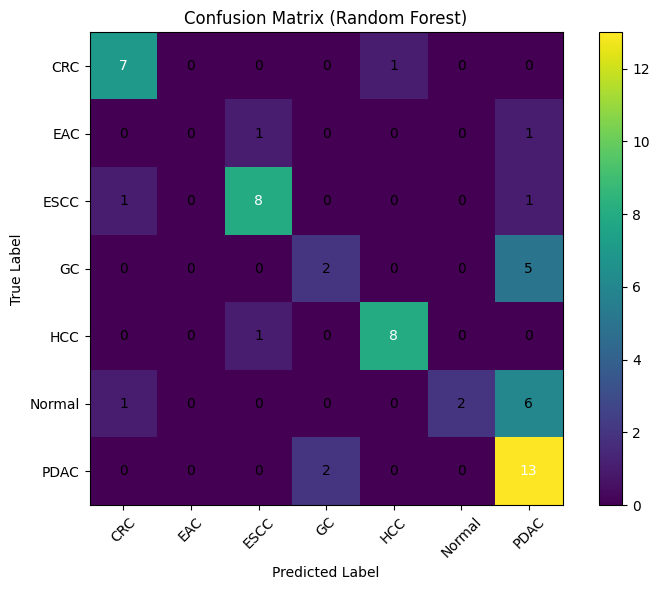

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix (Random Forest)")
plt.colorbar()

tick_marks = np.arange(len(rf.classes_))
plt.xticks(tick_marks, rf.classes_, rotation=45)
plt.yticks(tick_marks, rf.classes_)

# Add numbers inside cells
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i, cm[i, j],
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black"
        )

plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc

fpr = {}
tpr = {}
roc_auc = {}

for i, cls in enumerate(rf.classes_):
    fpr[cls], tpr[cls], _ = roc_curve(
        y_test_bin[:, i],
        y_proba[:, i]
    )
    roc_auc[cls] = auc(fpr[cls], tpr[cls])


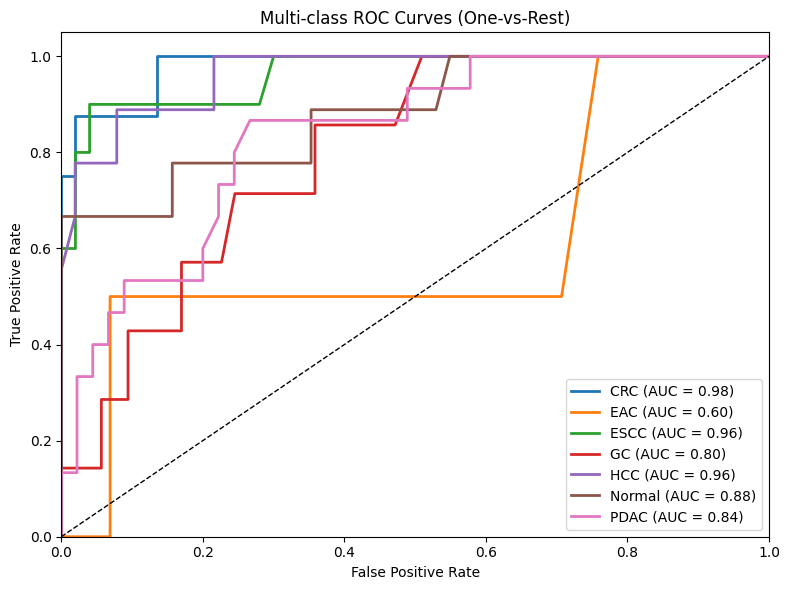

In [ ]:
plt.figure(figsize=(8, 6))

for cls in rf.classes_:
    plt.plot(
        fpr[cls],
        tpr[cls],
        lw=2,
        label=f"{cls} (AUC = {roc_auc[cls]:.2f})"
    )

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curves (One-vs-Rest)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


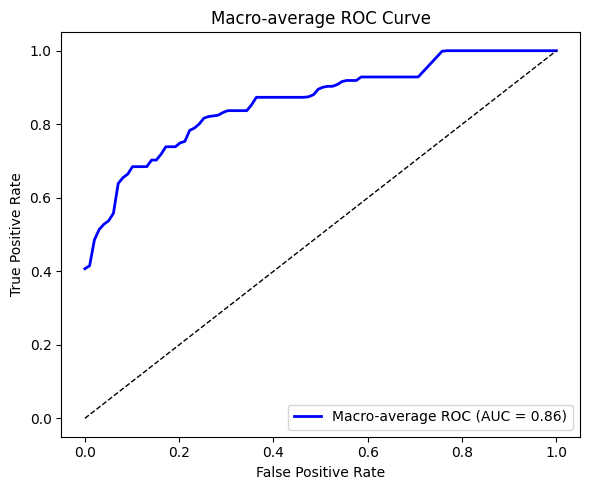

In [ ]:
import numpy as np

# Compute macro-average ROC
fpr_macro = np.linspace(0, 1, 100)

tpr_macro = np.zeros_like(fpr_macro)

for i in range(len(rf.classes_)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    tpr_macro += np.interp(fpr_macro, fpr, tpr)

tpr_macro /= len(rf.classes_)
auc_macro = auc(fpr_macro, tpr_macro)

plt.figure(figsize=(6, 5))
plt.plot(
    fpr_macro,
    tpr_macro,
    color="blue",
    lw=2,
    label=f"Macro-average ROC (AUC = {auc_macro:.2f})"
)
plt.plot([0, 1], [0, 1], "k--", lw=1)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro-average ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.svm import SVC

svm = SVC(
    kernel="linear",
    probability=True,
    class_weight="balanced",
    random_state=42
)

svm.fit(X_train_selected, y_train)


SVC(class_weight='balanced', kernel='linear', probability=True, random_state=42)

In [ ]:
y_proba_svm = svm.predict_proba(X_test_selected)

print("SVM probability shape:", y_proba_svm.shape)
print("SVM classes:", svm.classes_)


SVM probability shape: (60, 7)
SVM classes: ['CRC' 'EAC' 'ESCC' 'GC' 'HCC' 'Normal' 'PDAC']


In [ ]:
from sklearn.metrics import roc_auc_score

# Macro AUC
svm_macro_auc = roc_auc_score(
    y_test_bin,
    y_proba_svm,
    average="macro",
    multi_class="ovr"
)

# Weighted AUC
svm_weighted_auc = roc_auc_score(
    y_test_bin,
    y_proba_svm,
    average="weighted",
    multi_class="ovr"
)

print("SVM Macro AUC:", round(svm_macro_auc, 3))
print("SVM Weighted AUC:", round(svm_weighted_auc, 3))


SVM Macro AUC: 0.876
SVM Weighted AUC: 0.914


In [ ]:
from sklearn.metrics import roc_auc_score

# Recompute RF AUCs
rf_macro_auc = roc_auc_score(
    y_test_bin,
    y_proba,
    average="macro",
    multi_class="ovr"
)

rf_weighted_auc = roc_auc_score(
    y_test_bin,
    y_proba,
    average="weighted",
    multi_class="ovr"
)

print("RF Macro AUC:", round(rf_macro_auc, 3))
print("RF Weighted AUC:", round(rf_weighted_auc, 3))


RF Macro AUC: 0.861
RF Weighted AUC: 0.89


In [ ]:
print("=== AUC COMPARISON ===")
print(f"Random Forest  | Macro AUC: {rf_macro_auc:.3f} | Weighted AUC: {rf_weighted_auc:.3f}")
print(f"Linear SVM     | Macro AUC: {svm_macro_auc:.3f} | Weighted AUC: {svm_weighted_auc:.3f}")


=== AUC COMPARISON ===
Random Forest  | Macro AUC: 0.861 | Weighted AUC: 0.890
Linear SVM     | Macro AUC: 0.876 | Weighted AUC: 0.914


In [ ]:
# Count samples per cancer type (full dataset)
y.value_counts()


,count
tissue,
PDAC,74
ESCC,48
Normal,46
HCC,43
CRC,40
GC,37
EAC,12


In [ ]:
print("Train set distribution:")
y_train.value_counts()


Train set distribution:


,count
tissue,
PDAC,59
ESCC,38
Normal,37
HCC,34
CRC,32
GC,30
EAC,10


In [ ]:


print("\nTest set distribution:")
y_test.value_counts()



Test set distribution:


,count
tissue,
PDAC,15
ESCC,10
HCC,9
Normal,9
CRC,8
GC,7
EAC,2


In [ ]:
pd.Series(y_pred).value_counts()


,count
PDAC,26
ESCC,10
HCC,9
CRC,9
GC,4
Normal,2


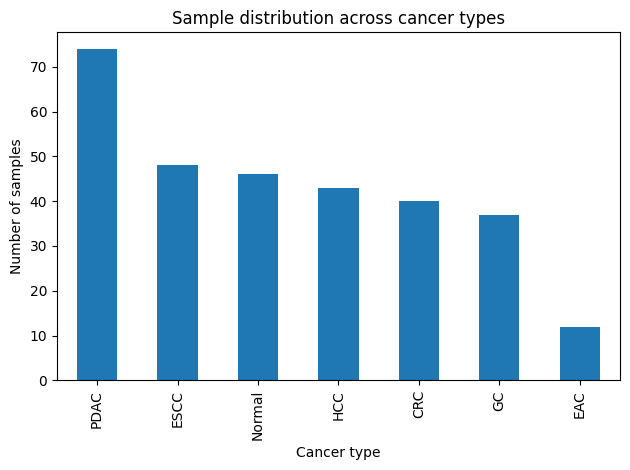

In [ ]:
import matplotlib.pyplot as plt

y.value_counts().plot(kind="bar")
plt.ylabel("Number of samples")
plt.xlabel("Cancer type")
plt.title("Sample distribution across cancer types")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score
import pandas as pd

per_class_auc = {}

for i, cls in enumerate(rf.classes_):
    per_class_auc[cls] = roc_auc_score(
        y_test_bin[:, i],
        y_proba[:, i]
    )

per_class_auc_df = (
    pd.Series(per_class_auc, name="AUC")
    .sort_values(ascending=False)
)

per_class_auc_df


,AUC
CRC,0.980769
HCC,0.964052
ESCC,0.963000
Normal,0.883442
PDAC,0.835556
GC,0.799191
EAC,0.599138


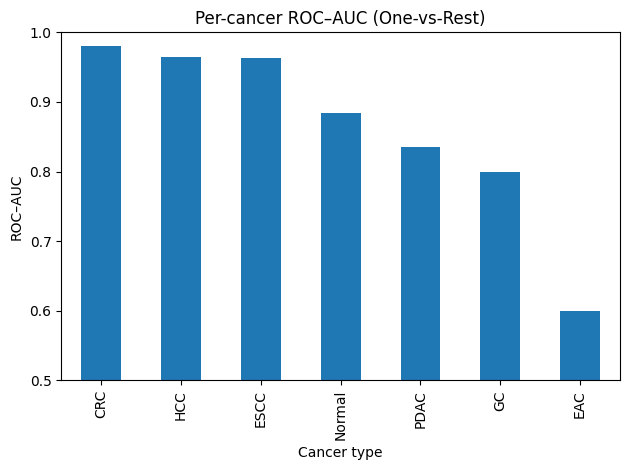

In [ ]:
import matplotlib.pyplot as plt

per_class_auc_df.plot(kind="bar")
plt.ylabel("ROC–AUC")
plt.xlabel("Cancer type")
plt.title("Per-cancer ROC–AUC (One-vs-Rest)")
plt.ylim(0.5, 1.0)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

rf_macro_auc = roc_auc_score(
    y_test_bin,
    y_proba,
    average="macro",
    multi_class="ovr"
)

rf_weighted_auc = roc_auc_score(
    y_test_bin,
    y_proba,
    average="weighted",
    multi_class="ovr"
)

print(f"Random Forest Macro AUC   : {rf_macro_auc:.3f}")
print(f"Random Forest Weighted AUC: {rf_weighted_auc:.3f}")


Random Forest Macro AUC   : 0.861
Random Forest Weighted AUC: 0.890


In [ ]:
import pandas as pd

# Replace the paper AUCs with the approximate values you read from the paper
paper_auc = {
    "CRC": 0.95,
    "HCC": 0.96,
    "ESCC": 0.93,
    "GC": 0.88,
    "EAC": 0.78,
    "PDAC": 0.85,
}

comparison_df = pd.DataFrame({
    "Our_AUC": per_class_auc_df,
    "Paper_AUC": pd.Series(paper_auc)
})

comparison_df["Difference (Our - Paper)"] = (
    comparison_df["Our_AUC"] - comparison_df["Paper_AUC"]
)

comparison_df



,Our_AUC,Paper_AUC,Difference (Our - Paper)
CRC,0.980769,0.95,0.030769
EAC,0.599138,0.78,-0.180862
ESCC,0.963000,0.93,0.033000
GC,0.799191,0.88,-0.080809
HCC,0.964052,0.96,0.004052
Normal,0.883442,NaN,NaN
PDAC,0.835556,0.85,-0.014444


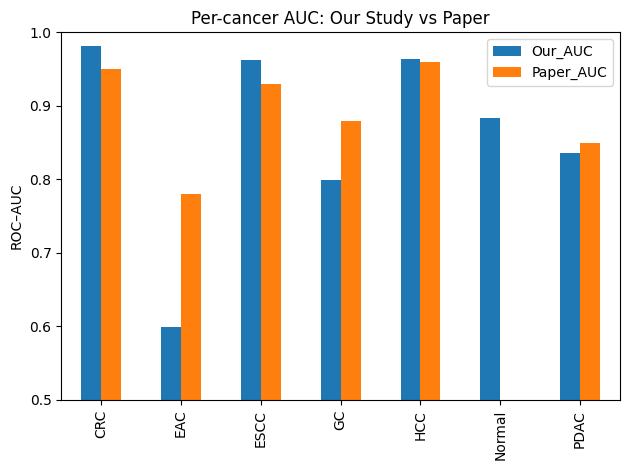

In [ ]:
comparison_df[["Our_AUC", "Paper_AUC"]].plot(kind="bar")
plt.ylabel("ROC–AUC")
plt.title("Per-cancer AUC: Our Study vs Paper")
plt.ylim(0.5, 1.0)
plt.tight_layout()
plt.show()
